In [1]:
import tensorflow as tf

# Learn Tensorflow

The whole notes come from stanford cs20si

### What is a Tensorflow session

The following notes come from [this blog](http://danijar.com/what-is-a-tensorflow-session/)

Graph defines the computation, session execute graphs (or part of graph)

In [2]:
# define graph
variable = tf.Variable(42, name='foo')
initialize = tf.global_variables_initializer()
assign = variable.assign(13)

In [3]:
# run graph in session
with tf.Session() as sess:
    sess.run(initialize)
    sess.run(assign)
    print(sess.run(variable))

13


### Constant Types

The following notes come from Stanford CS20si

In [4]:
a = tf.constant([2, 2], name='vector') # specify name (1d tensor)
b = tf.constant([[0, 1], [2, 3]]) # 2*2 matrix 
c = tf.zeros([2, 3], tf.int32) # specify data type
d = tf.zeros_like(b) # same shape
e = tf.fill([2, 3], 8) # fill with same value
with tf.Session() as sess:
    print('a:')
    print(sess.run(a))
    print('b:')
    print(sess.run(b))
    print('c:')
    print(sess.run(c))
    print('d:')
    print(sess.run(d))
    print('e:')
    print(sess.run(e))

a:
[2 2]
b:
[[0 1]
 [2 3]]
c:
[[0 0 0]
 [0 0 0]]
d:
[[0 0]
 [0 0]]
e:
[[8 8 8]
 [8 8 8]]


In [5]:
f = tf.linspace(10.0, 13.0, 4) # lin seq
g = tf.range(10.0, 14.0, 1) # lin seq, another way
# PA: they are not iterable

In [6]:
with tf.Session() as sess:
    print('f:')
    print(sess.run(f))
    print('g:')
    print(sess.run(g))

f:
[ 10.  11.  12.  13.]
g:
[ 10.  11.  12.  13.]


In [7]:
h = tf.random_normal([2, 2]) # random normal
i = tf.truncated_normal([2, 2]) # truncated normal
j = tf.random_uniform([2, 2])
k = tf.random_shuffle(b) # randomly shuffle tensor along 1st dimension
l = tf.random_crop(b, [2, 1])

In [8]:
with tf.Session() as sess:
    print('h:')
    print(sess.run(h))
    print('i:')
    print(sess.run(i))
    print('j:')
    print(sess.run(j))
    print('k:')
    print(sess.run(k))
    print('l:')
    print(sess.run(l))

h:
[[ 1.69338918  1.41905665]
 [ 0.39666057  1.50088573]]
i:
[[-1.18458259 -0.32656613]
 [-0.58195204 -1.98113585]]
j:
[[ 0.79647779  0.7423954 ]
 [ 0.81585598  0.65590012]]
k:
[[0 1]
 [2 3]]
l:
[[0]
 [2]]


### Math Operations

In [9]:
with tf.Session() as sess:
    print('a:')
    print(sess.run(a))
    print('b:')
    print(sess.run(b))

a:
[2 2]
b:
[[0 1]
 [2 3]]


In [10]:
with tf.Session() as sess:
    print('add:')
    print(sess.run(tf.add(a, b))) # elementwise add
    print('add_n:')
    print(sess.run(tf.add_n([b, b, b]))) # b+b+b

add:
[[2 3]
 [4 5]]
add_n:
[[0 3]
 [6 9]]


In [11]:
with tf.Session() as sess:
    print('mul:')
    print(sess.run(tf.multiply(a, b))) # elementwise mul
    print('matmul')
    print(sess.run(tf.matmul(tf.reshape(a, shape=[1,2]), b))) # b+b+b

mul:
[[0 2]
 [4 6]]
matmul
[[4 8]]


In [12]:
with tf.Session() as sess:
    print('div:')
    print(sess.run(tf.div(b, a)))
    print('mod')
    print(sess.run(tf.mod(b, a))) # b+b+b

div:
[[0 0]
 [1 1]]
mod
[[0 1]
 [0 1]]


### Variables

In [13]:
my_const = tf.constant([1.0, 2.0], name='my_const')
print(tf.get_default_graph().as_graph_def())

node {
  name: "foo/initial_value"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 42
      }
    }
  }
}
node {
  name: "foo"
  op: "VariableV2"
  attr {
    key: "container"
    value {
      s: ""
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
  attr {
    key: "shared_name"
    value {
      s: ""
    }
  }
}
node {
  name: "foo/Assign"
  op: "Assign"
  input: "foo"
  input: "foo/initial_value"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "_class"
    value {
      list {
        s: "loc:@foo"
      }
    }
  }
  attr {
    key: "use_locking"
    value {
      b: true
    }
  }
  attr {
    key: "validate_shape"
    value {
      b: true
    }
  }
}
node {
  name: "foo/read"
  op: "Ide

### Declare Variables

In [14]:
a = tf.Variable(2) # scalar
b = tf.Variable([2, 3]) # vector
c = tf.Variable([[0, 1], [2, 3]]) # matrix
W = tf.Variable(tf.zeros([784, 10]))

In [15]:
init = tf.global_variables_initializer() # init all vars
init_sub = tf.variables_initializer([a, b], name='init_ab') #init subset

In [16]:
with tf.Session() as sess:
    sess.run(W.initializer) # initialize single var
    print(W)

Tensor("Variable_3/read:0", shape=(784, 10), dtype=float32)


In [17]:
with tf.Session() as sess:
    sess.run(W.initializer) # initialize single var
    print(W.eval()) # get the vale

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


### Interactive Session

Makes itself the default session. Does not need explicityly call the session to call run() or explicity()

In [18]:
sess = tf.InteractiveSession()
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a*b
print(c.eval())
sess.close()

30.0


### Placeholder

For unknown values

In [19]:
a = tf.placeholder(tf.float32, shape=[3])
b = tf.constant([5,5,5], tf.float32)
c = a + b
with tf.Session() as sess:
    print(sess.run(c, {a: [1, 2, 3]}))

[ 6.  7.  8.]


### PA

Always try to seperate the definition of ops and their execution when you can

### Linear and LR in TF

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd
% matplotlib inline

/Users/BohaoHuang/anaconda2/envs/bhplayground/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
DATA_FILE = ']repo/tf-stanford-tutorials/data/fire_theft.xls'

In [4]:
# read in data
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [43]:
# placeholder for inputs
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [44]:
# create weith and bias
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

In [45]:
# construct model
Y_predict = X*w + b

In [46]:
# define loss function
loss = tf.square(Y - Y_predict, name='loss')

In [47]:
# graident descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [49]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100): # 100 epochs
        for x, y in data:
            sess.run(optimizer, feed_dict={X: x, Y:y})
    w_value, b_value = sess.run([w, b])

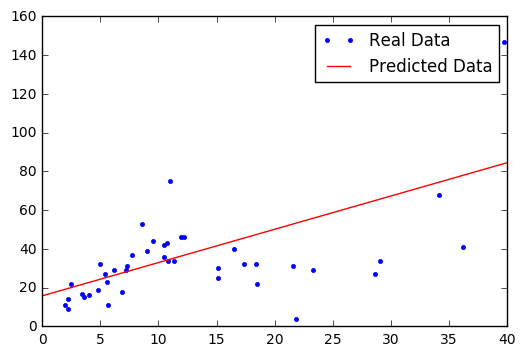

In [61]:
plt.plot(data[:,0], data[:,1], '.', label='Real Data')
x_range = np.array(plt.xlim())
plt.plot(x_range, w_value*x_range+b_value, 'r-', label='Predicted Data')
plt.legend()
plt.show()

**More complex model**

In [69]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
w = tf.Variable(0.0, name='weights_1')
u = tf.Variable(0.0, name='weights_2')
b = tf.Variable(0.0, name='bias')
Y_predict = X*X*w + X*u + b
loss = tf.square(Y-Y_predict)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-6).minimize(loss)

In [70]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10): # 100 epochs
        for x, y in data:
            sess.run(optimizer, feed_dict={X: x, Y:y})
    w_value, u_value, b_value = sess.run([w, u, b])

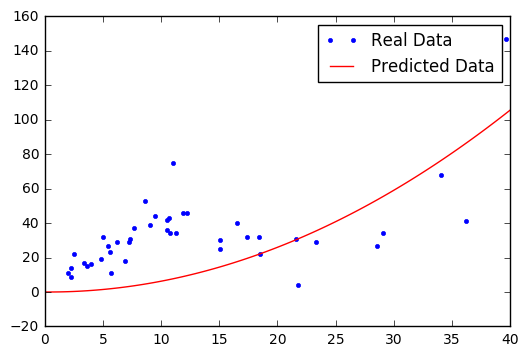

In [72]:
plt.plot(data[:,0], data[:,1], '.', label='Real Data')
x_range = np.array(plt.xlim())
x_range = np.linspace(x_range[0], x_range[1], 100)
plt.plot(x_range, x_range*x_range*w_value + u_value*x_range + b_value, 'r-', label='Predicted Data')
plt.legend()
plt.show()